<a href="https://colab.research.google.com/github/Coding-xyl123/OralCancer_dectction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
!unzip /content/OralCancer.zip

Archive:  /content/OralCancer.zip
replace __MACOSX/._OralCancer? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._OralCancer   
  inflating: __MACOSX/OralCancer/._cancer  
  inflating: __MACOSX/OralCancer/._non-cancer  
  inflating: OralCancer/cancer/dataset_280x190_tongue_cancer_facts_ref_guide.jpg  
  inflating: __MACOSX/OralCancer/cancer/._dataset_280x190_tongue_cancer_facts_ref_guide.jpg  
  inflating: OralCancer/cancer/images (2).jpeg  
  inflating: __MACOSX/OralCancer/cancer/._images (2).jpeg  
  inflating: OralCancer/cancer/download.jpeg  
  inflating: __MACOSX/OralCancer/cancer/._download.jpeg  
  inflating: OralCancer/cancer/cancer 6.jpg  
  inflating: __MACOSX/OralCancer/cancer/._cancer 6.jpg  
  inflating: OralCancer/cancer/dataset_41415_2000_Article_BF4800481_Fig1_HTML.jpg  
  inflating: __MACOSX/OralCancer/cancer/._dataset_41415_2000_Article_BF4800481_Fig1_HTML.jpg  
  inflating: OralCancer/cancer/dataset_2-1080x675.jpg  
  inflating: __MACOSX/OralCancer/can

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import shutil
import glob
import cv2

In [103]:
#count the number of images in the respectvie classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR = "/content/OralCancer"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()

dict_items([('non-cancer', 44), ('cancer', 87)])

#we will split the data such that 70% for Train data 15% for Validation 15% for testing

In [104]:
#we will create a train folder
if not os.path.exists("./train"):
    os.mkdir("./train")

    for dir in os.listdir(ROOT_DIR):
        os.makedirs(os.path.join("./train/", dir), exist_ok = True)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(70/100*number_of_images[dir])-5), replace = False):
            O = os.path.join(ROOT_DIR, dir, img)
            D = os.path.join("./train", dir)
            shutil.copy(O, D)
            os.remove(O)
else:
   print("the folder exsist")




the folder exsist


In [105]:
def dataFolder(p, split):
  #we will create a train folder
  if not os.path.exists("./" + p):
    os.mkdir("./" + p)

    for dir in os.listdir(ROOT_DIR):
        os.makedirs(os.path.join("./" + p + "/", dir), exist_ok = True)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace = False):
            O = os.path.join(ROOT_DIR, dir, img)
            D = os.path.join("./" + p, dir)
            shutil.copy(O, D)
            os.remove(O)
    else:
        print(f"{p}the folder exsist")



In [106]:
dataFolder("train", 0.7)

In [107]:
dataFolder("val", 0.15)

In [108]:
dataFolder("test", 0.15)

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.mobilenet import preprocess_input


In [110]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()

dict_items([('non-cancer', 44), ('cancer', 87)])

Model Build

In [111]:
!pip install keras

In [112]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras

In [113]:
#CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3), padding = 'same'))
model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.25))

model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

Preparing our data using Data Generator

In [115]:
def preprocessingImages1(path):
  """
  input : Path
  output : Preprocessed images
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')
  return image

In [116]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 80 images belonging to 2 classes.


In [117]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}

In [118]:
def preprocessingImages2(path):
  """
  input : Path
  output : Preprocessed images
  """
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')
  return image

In [119]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 9 images belonging to 2 classes.


In [120]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 9 images belonging to 2 classes.


Model Training

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
import keras

In [122]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

In [123]:
for layer in base_model.layers:
    layer.trainable = False

In [124]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = "sigmoid")(X)

model = Model(base_model.input, X)

In [125]:
model.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [126]:
model.compile(optimizer = 'rmsprop', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [127]:
##Call Back
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.keras", verbose=1, save_best_only=True, mode = 'auto')
#Early Stopping
es = EarlyStopping(monitor = "val_accuracy", min_delta=0.01, patience = 3, verbose = 1, mode = 'auto')
cb = [es, mc]


In [128]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cb
)


Epoch 1/30
 3/10 ━━━━━━━━━━━━━━━━━━━━ 5s 729ms/step - accuracy: 0.7281 - loss: 2.6914


Epoch 1: val_accuracy improved from -inf to 0.88889, saving model to ./bestmodel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - accuracy: 0.7084 - loss: 4.5317 - val_accuracy: 0.8889 - val_loss: 0.5645
Epoch 2/30
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5264 - loss: 7.5470
Epoch 2: val_accuracy improved from 0.88889 to 1.00000, saving model to ./bestmodel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5779 - loss: 6.4614 - val_accuracy: 1.0000 - val_loss: 0.0640
Epoch 3/30
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8653 - loss: 1.1015
Epoch 3: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8808 - loss: 0.9351 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 4/30
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9444 - loss: 0.2463
Epoch 4: val_accuracy did not improve from 1.00000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9396 - loss: 0.2128 - val_accuracy: 1.0000 - val_loss: 0.0347


In [129]:
#load the best fit model
model = load_model("/content/bestmodel.keras")

In [130]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.3688e-05
Our model accuracy is 1.0


In [131]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

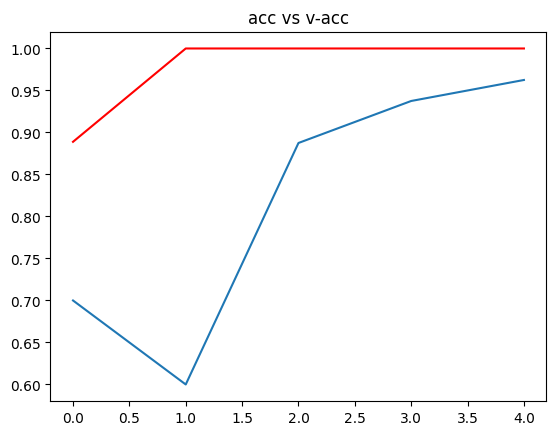

In [132]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

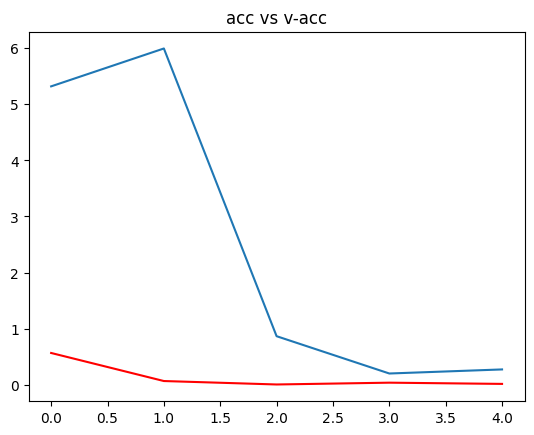

In [133]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("acc vs v-acc")
plt.show()

In [134]:
from keras.preprocessing.image import load_img, img_to_array

In [140]:
!unzip /content/cases.zip

Archive:  /content/cases.zip
replace cases/unmarked_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cases/unmarked_1.jpg    
  inflating: __MACOSX/cases/._unmarked_1.jpg  
  inflating: cases/Unmarked_2.jpg    
  inflating: __MACOSX/cases/._Unmarked_2.jpg  
  inflating: cases/Unmarked_3.jpg    
  inflating: __MACOSX/cases/._Unmarked_3.jpg  
  inflating: cases/.DS_Store         
  inflating: __MACOSX/cases/._.DS_Store  
  inflating: cases/Unmarked_4.jpg    
  inflating: __MACOSX/cases/._Unmarked_4.jpg  
  inflating: cases/case4 (1).jpg     
  inflating: __MACOSX/cases/._case4 (1).jpg  
  inflating: cases/case1 (2).jpg     
  inflating: __MACOSX/cases/._case1 (2).jpg  
  inflating: cases/case5.jpg         
  inflating: __MACOSX/cases/._case5.jpg  
  inflating: cases/case2.jpg         
  inflating: __MACOSX/cases/._case2.jpg  
  inflating: cases/case3.jpg         
  inflating: __MACOSX/cases/._case3.jpg  


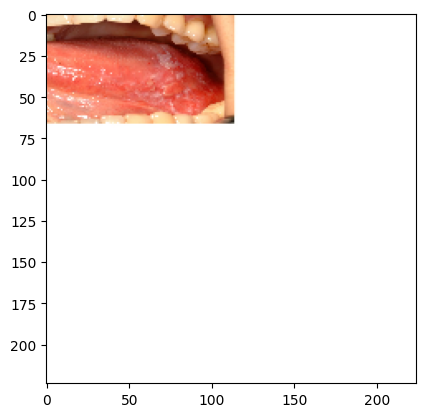

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The image is having Tumor


In [146]:
path = "/content/cases/case1 (2).jpg"
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)
pred = (pred > 0.5).astype(int)[0][0]

if pred == 0:
    print("The image is having Tumor")
else:
    print("The image is not having a Tumor")


In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 6, verbose = 1)
#model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.keras", verbose=1, save_best_only=True, mode = 'auto')


cd = [es, mc]


Model Tranining


In [37]:
hs = model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7125 - loss: 0.4454

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7047 - loss: 0.4591 - val_accuracy: 0.7778 - val_loss: 0.3765
Epoch 2/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7222 - loss: 0.4484
Epoch 2: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7396 - loss: 0.4397 - val_accuracy: 0.7778 - val_loss: 0.3856
Epoch 3/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8611 - loss: 0.3569
Epoch 3: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8307 - loss: 0.3975 - val_accuracy: 0.7778 - val_loss: 0.4526
Epoch 4/30
2/8 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8047 - loss: 0.3939
Epoch 4: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7824 - loss: 0.4129 - val_accuracy: 0.5556 - val_loss: 0.5446
Epoch 5/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8948 - loss: 0.3742
Epoch

In [38]:
#Model Graphical Interpretation
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

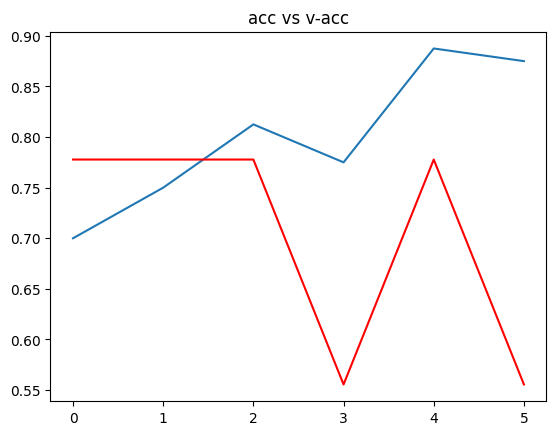

In [39]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

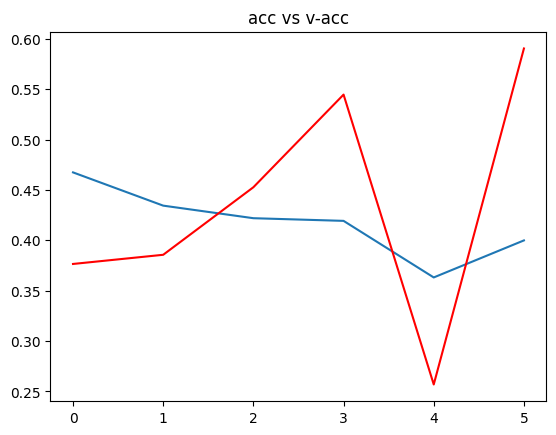

In [40]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("acc vs v-acc")
plt.show()

In [41]:
#Model Accuracy
from keras.models import load_model
model = load_model("/content/bestmodel.keras")

Model Accuracy

In [44]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - accuracy: 0.8889 - loss: 0.4895
Our model accuracy is 0.8888888955116272


In [58]:
from keras.preprocessing.image import load_img, img_to_array

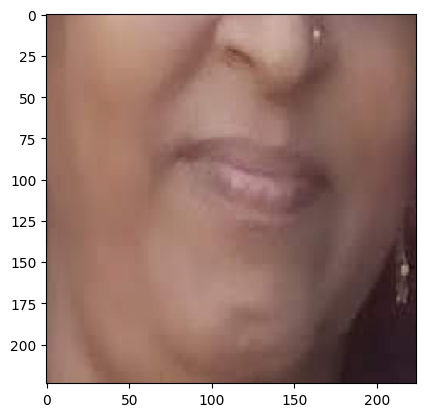

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is having Tumor


In [64]:
path = "/content/OralCancer/non-cancer/20190916_1420142.jpg"
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)
pred = (pred > 0.5).astype(int)[0][0]

if pred == 0:
    print("The image is having Tumor")
else:
    print("The image is not having a Tumor")


In [50]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}